In [1]:
!gdown https://drive.google.com/uc?id=1LQXGTRB174vrRbcBKSqrGA_XReSbIm_1
!unzip template-matching.zip

Downloading...
From: https://drive.google.com/uc?id=1LQXGTRB174vrRbcBKSqrGA_XReSbIm_1
To: /content/template-matching.zip
100% 682k/682k [00:00<00:00, 10.8MB/s]
Archive:  template-matching.zip
  inflating: template-matching/image1.jpg  
  inflating: template-matching/image2.jpg  
  inflating: template-matching/image3.jpg  
  inflating: template-matching/image4.jpg  
  inflating: template-matching/image5.jpg  
  inflating: template-matching/image6.jpg  
  inflating: template-matching/image7.jpg  
  inflating: template-matching/image8.jpg  
  inflating: template-matching/imagenet1000_clsid_to_human.pkl  
  inflating: template-matching/template.jpg  
  inflating: template-matching/template_cat1.jpg  


In [59]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing import image as kimage
import matplotlib.patches as patches
from PIL import Image

In [60]:
PATH = '/content/template-matching/'
height = 800
width  = 1000
image = kimage.load_img(PATH + 'image2.jpg', target_size=(height, width))

side = 360
template = kimage.load_img(PATH + 'template_cat1.jpg', target_size=(side, side))

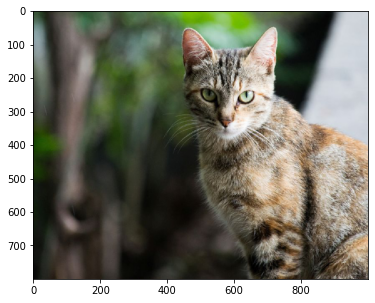

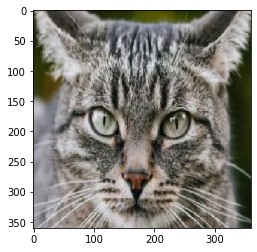

In [61]:
plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.figure(figsize = (4, 4))
plt.imshow(template)

In [65]:
# Normalize
image = kimage.img_to_array(image) / 255.0
template = kimage.img_to_array(template) / 255.0

distances = []
for i in tqdm(range(height - side + 1)):
    for j in range(width - side + 1):
        patch = image[i:i+side, j:j+side, :]
        distance = np.absolute(patch - template).sum()
        distances.append((distance, i, j))
distances_sorted = sorted(distances)

100%|██████████| 441/441 [03:03<00:00,  2.41it/s]


<Figure size 1152x1152 with 0 Axes>

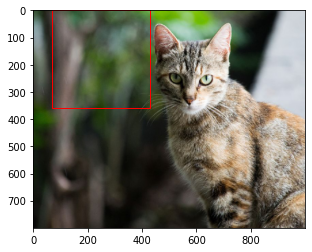

In [75]:
img = kimage.load_img(PATH + 'image2.jpg', target_size=(height, width))

plt.figure(figsize=(16, 16))
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create a Rectangle patch
for i in range(1): 
  rect = patches.Rectangle((distances_sorted[i][2], distances_sorted[i][1]), 
                           side, side, linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()